# PIU - Data Exploration

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

## 1. Load data

### 1.1 Load

In [2]:
#load traning data
train_values = pd.read_csv('data/training_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')

In [3]:
train_values.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_labels.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [5]:
# Merge these two datasets
df_train = train_values.merge(train_labels, on='id', how='inner')
df_train.shape

(59400, 41)

In [6]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
#Load test data
df_test = pd.read_csv('data/test_set_values.csv')
df_test.shape

(14850, 40)

## 2. Checking the values of the data

### 2.1 Print columns labels

In [8]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [9]:
df_test.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### 2.2 Initial statistic

In [10]:
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [11]:
df_test.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


### 2.3 Check null value

In [12]:
# List number of null values
df_train.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

`'funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit'` exist `null` value in these columns

**'quantity_group' has strange values like 'unknow'.**

In [13]:
df_test.apply(lambda x: sum(x.isnull()))

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

## 3. Data Cleaning

### 3.1 Drop redundant columns

In [14]:
df_train = df_train.drop(columns = ['extraction_type','extraction_type_group','management','payment','quality_group','quantity_group','source_type','source','waterpoint_type'])
df_test = df_test.drop(columns = ['extraction_type','extraction_type_group','management','payment','quality_group','quantity_group','source_type','source','waterpoint_type'])

In [15]:
# There are too many null values in 'scheme name', so drop it
df_train = df_train.drop(columns = ['scheme_name'])
df_test = df_test.drop(columns = ['scheme_name'])

In [16]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [17]:
df_test.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group'],
      dtype='object')

### 3.2 Explore featrues one by one and do some visualisations

Text(0.5, 1.0, 'Distribution of status')

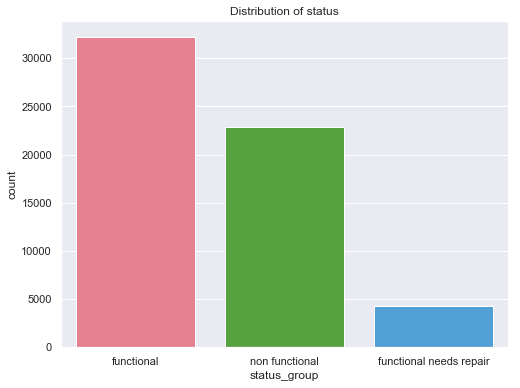

In [18]:
# Status group
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='status_group', data=df_train, palette="husl")
ax.set_title('Distribution of status')

**Status**: Most of the wells are functional, only a little need repair, the quatity of non-functional wells is not small.

Text(0.5, 1.0, 'Geographical Distribution of Wells')

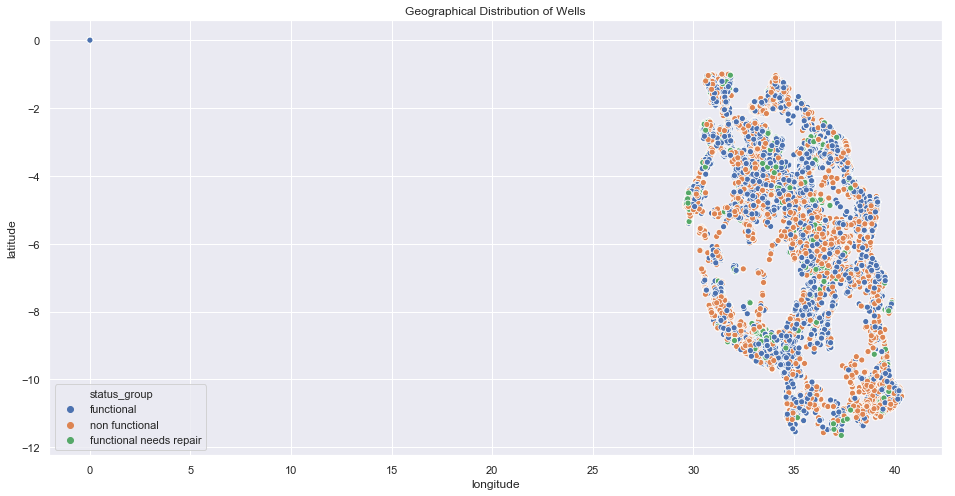

In [19]:
# Geographical distribution
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df_train)
ax.set_title('Geographical Distribution of Wells')

Obviously, there are missing value.
Let's filter them and visualise again.

In [20]:
df_train[df_train['longitude'] == 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_class,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,...,False,0,handpump,user-group,unknown,unknown,unknown,groundwater,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,...,True,0,submersible,user-group,unknown,unknown,dry,groundwater,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,...,False,0,gravity,parastatal,other,soft,seasonal,surface,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,...,False,0,other,user-group,unknown,soft,enough,groundwater,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,...,True,0,handpump,user-group,never pay,soft,insufficient,groundwater,hand pump,functional needs repair
256,33500,0.0,2011-07-18,Hesawa,0,DWE,0.0,-2.000000e-08,Bombani,0,...,True,0,handpump,user-group,never pay,unknown,dry,groundwater,hand pump,non functional
285,71487,0.0,2012-10-25,Ridep,0,DWE,0.0,-2.000000e-08,Nyanguruma,0,...,True,0,handpump,user-group,on failure,salty,insufficient,groundwater,hand pump,functional
301,70379,0.0,2011-07-18,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Nersing College,0,...,True,0,handpump,user-group,never pay,soft,insufficient,groundwater,hand pump,functional
306,59713,0.0,2011-07-30,Plan International,0,Plan Internationa,0.0,-2.000000e-08,Petro,0,...,True,0,handpump,user-group,never pay,soft,insufficient,groundwater,hand pump,functional
321,45415,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Upendo,0,...,False,0,handpump,user-group,unknown,soft,enough,groundwater,hand pump,functional needs repair


In [21]:
df_geodist = df_train[df_train['longitude'] != 0]

Text(0.5, 1.0, 'Geographical Distribution of Wells')

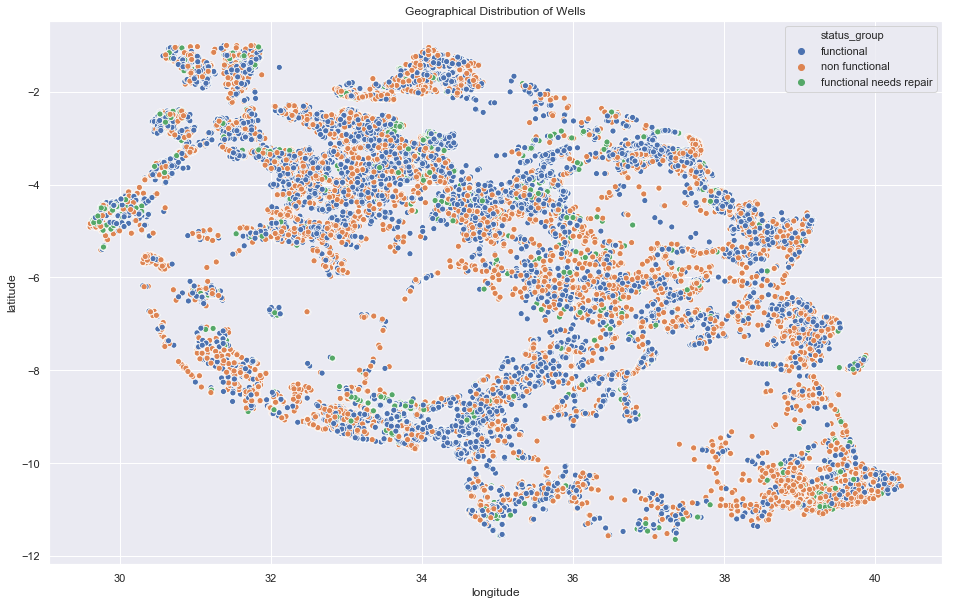

In [22]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df_geodist)
ax.set_title('Geographical Distribution of Wells')

It seems that these two columns can not provide efficient value when train data, it is better to remove them.

In [23]:
df_train = df_train.drop(columns = ['longitude', 'latitude'])
df_test = df_test.drop(columns = ['longitude', 'latitude'])

Text(0.5, 1.0, 'Date Recorded')

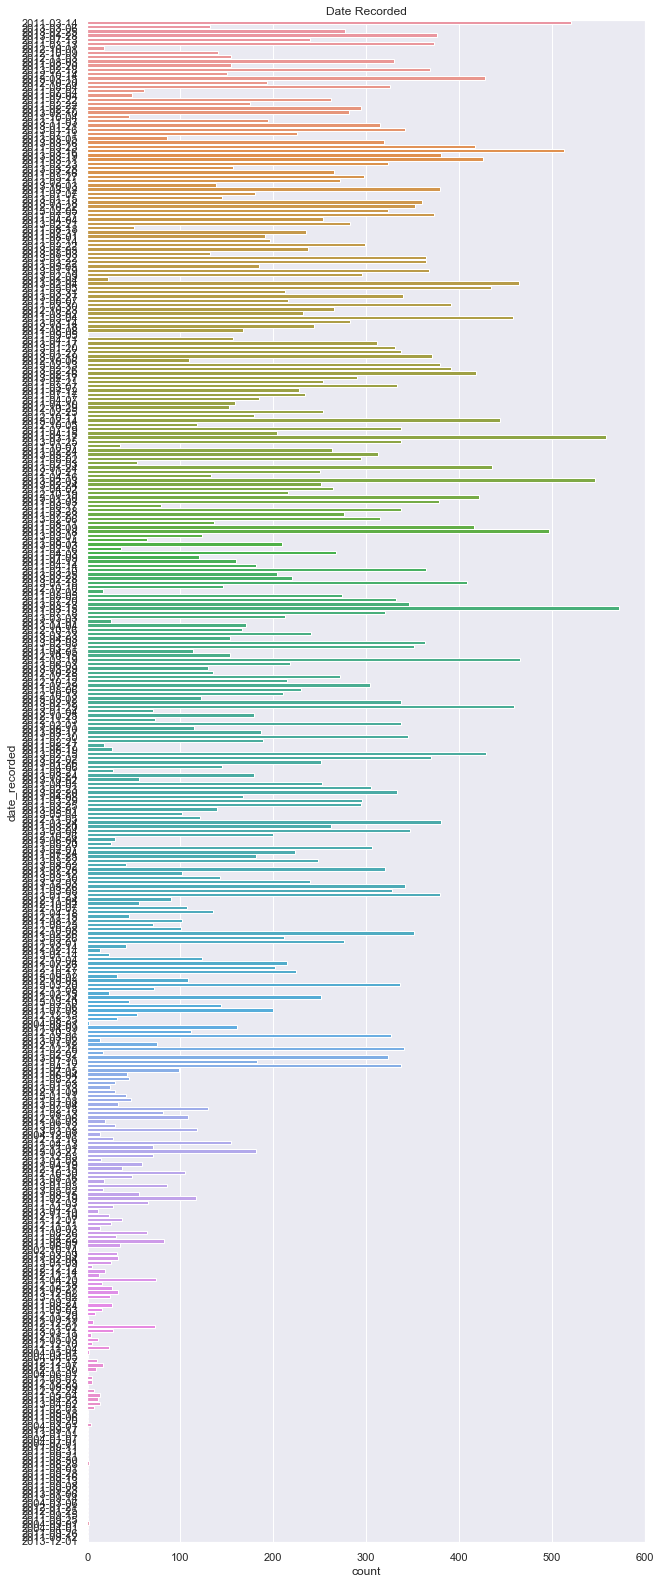

In [24]:
# 'date_recorded'
fig, ax = plt.subplots(figsize=(10, 28))
ax = sns.countplot(y = df_train['date_recorded'])
ax.set_title('Date Recorded')

In [25]:
df_train['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
2013-01-18    409
2013-02-26    391
2011-03-30    391
2011-03-24    381
2013-03-19    381
2013-02-13    380
2013-01-23    379
2011-03-12    379
2011-03-03    378
2013-01-28    376
             ... 
2011-09-27      1
2011-09-23      1
2011-09-21      1
2011-09-16      1
2013-12-01      1
2013-01-06      1
2011-09-14      1
2011-09-12      1
2004-06-01      1
2011-09-20      1
2011-09-28      1
2004-07-01      1
2004-01-07      1
2011-09-19      1
2011-09-25      1
2011-09-05      1
2011-09-13      1
2011-09-08      1
2013-01-01      1
2004-04-01      1
2011-09-01      1
2011-09-26      1
2011-09-18      1
2012-01-25      1
2004-03-06

In [26]:
# Find the most recent timestamp
pd.to_datetime(df_train['date_recorded']).max()

Timestamp('2013-12-03 00:00:00')

In [27]:
pd.to_datetime(df_test['date_recorded']).max()

Timestamp('2013-12-03 00:00:00')

'date_recorded': It is unreadable, better to remove.

In [28]:
# Transform the string date into days since recorded
df_train['date_recorded'] = pd.to_datetime(df_train['date_recorded']).max() - pd.to_datetime(df_train['date_recorded'])
df_train.rename(columns = {'date_recorded':'days_since_recorded'}, inplace=True)

In [29]:
df_test['date_recorded'] = pd.to_datetime(df_test['date_recorded']).max() - pd.to_datetime(df_test['date_recorded'])
df_test.rename(columns = {'date_recorded':'days_since_recorded'}, inplace=True)

In [30]:
df_train['days_since_recorded'] = df_train['days_since_recorded'].astype('timedelta64[D]').astype(int)
df_test['days_since_recorded'] = df_test['days_since_recorded'].astype('timedelta64[D]').astype(int)

In [31]:
# 'funder'
df_train['funder'].value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

Findings:
- Most of the wells are funded by government.
- Lots of wells are owned by individual person.
- There are 777 0 value in 'funder' column.

In [32]:
# Top 5 will be remained as it is and after that they will be categorised into other
def funder_cleaning(df):
    data = df['funder']
    if data == 'Government Of Tanzania':
        return 'government'
    elif data == 'Danida':
        return 'danida'
    elif data == 'Hesawa':
        return 'hesawa'
    elif data == 'Rwssp':
        return 'rwssp'
    elif data == 'World Bank':
        return 'world_bank'
    else:
        return 'other'

In [33]:
df_train['funder'] = df_train.apply(lambda row: funder_cleaning(row), axis=1)
df_train['funder'].unique()

array(['other', 'rwssp', 'danida', 'hesawa', 'government', 'world_bank'],
      dtype=object)

In [34]:
df_test['funder'] = df_test.apply(lambda row: funder_cleaning(row), axis=1)
df_test['funder'].unique()

array(['other', 'government', 'world_bank', 'danida', 'hesawa', 'rwssp'],
      dtype=object)

In [35]:
# 'installer'
df_train['installer'].value_counts()

DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
KKKT                          898
Hesawa                        840
0                             777
TCRS                          707
Central government            622
CES                           610
Community                     553
DANID                         552
District Council              551
HESAWA                        539
LGA                           408
World vision                  408
WEDECO                        397
TASAF                         396
District council              392
Gover                         383
AMREF                         329
TWESA                         316
WU                            301
Dmdd                          287
ACRA                          278
World Vision                  270
SEMA                          249
DW                            246
OXFAM         

In [36]:
# The same, remain top 5
def installer_cleaning(df):
    data = df['installer']
    if data == 'DWE':
        return 'dwe'
    elif data == 'Government':
        return 'government'
    elif data == 'RWE':
        return 'rwe'
    elif data == 'Commu':
        return 'commu'
    elif data == 'DANIDA':
        return 'danida'
    else:
        return 'other'

In [37]:
df_train['installer'] = df_train.apply(lambda row: installer_cleaning(row), axis=1)
df_train['installer'].unique()

array(['other', 'dwe', 'danida', 'commu', 'government', 'rwe'],
      dtype=object)

In [38]:
df_test['installer'] = df_test.apply(lambda row: installer_cleaning(row), axis=1)
df_test['installer'].unique()

array(['other', 'dwe', 'danida', 'government', 'commu', 'rwe'],
      dtype=object)

In [39]:
# 'gps_height'
df_train['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
 1290       52
-14         51
 303        51
-18         49
-19         47
 1269       46
 1295       46
 1304       45
-23         45
 280        44
 1538       44
 1286       44
-8          44
-17         44
 1332       43
 320        43
 1317       42
 1293       42
 1319       42
 1359       42
 1264       42
 1288       42
 1401       42
 1303       42
-27         42
         ...  
 2506        1
 2023        1
-53          1
 2364        1
 2332        1
 2402        1
 2236        1
 2420        1
 2291        1
 2407        1
 2080        1
 2250        1
 591         1
 2378        1
 2535        1
 2614        1
 2484        1
 2450        1
 2072        1
 2286        1
 2567        1
 2322        1
 2254        1
 2264        1
 2464        1
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [40]:
# 'wpt_name'
df_train['wpt_name'].unique()

array(['none', 'Zahanati', 'Kwa Mahundi', ..., 'Kwa Yahona Kuvala',
       'Mshoro', 'Kwa Mzee Lugawa'], dtype=object)

`'wpt_name'` has no predictive power, remove

In [41]:
df_train = df_train.drop(columns = ['wpt_name'])
df_test = df_test.drop(columns = ['wpt_name'])

In [42]:
# 'num_private'
df_train['num_private'].value_counts()

0       58643
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
        ...  
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, Length: 65, dtype: int64

There is no description about what `'num_private'` means, and most value of it are 0. It is better to remove them.

In [43]:
df_train = df_train.drop(columns = ['num_private'])
df_test = df_test.drop(columns = ['num_private'])

In [44]:
# 'basin'
df_train['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

Text(0.5, 1.0, 'Basin vs. Status Group')

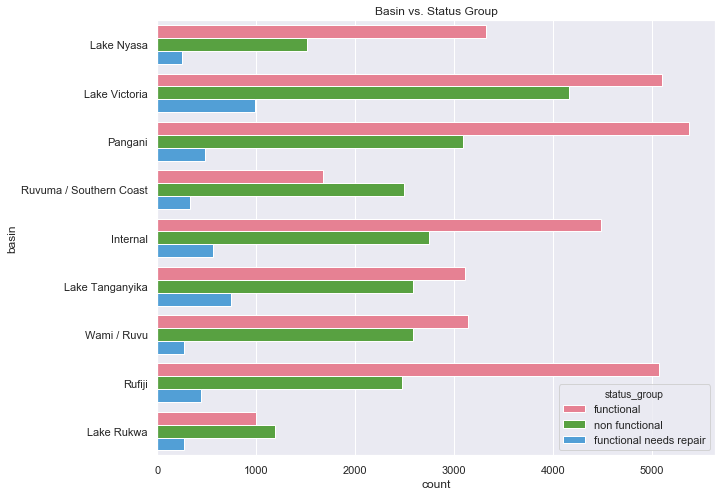

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(y='basin', hue='status_group', data=df_train, palette="husl")
ax.set_title('Basin vs. Status Group')

In [46]:
# 'subvillage'
df_train['subvillage'].value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Msikitini         134
Miembeni          134
1                 132
Kibaoni           114
Kanisani          111
I                 109
Mapinduzi         109
Mjini             108
Mjimwema          108
Mkwajuni          104
Mwenge            102
Mabatini           98
Azimio             98
Mbugani            95
Mission            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Mbale 'B'           1
Nyakaflo B          1
London B            1
Ngemo B             1
Miyenze             1
Lesala              1
Kikonya             1
Kasuzu              1
Namali              1
Videnge             1
Ikologoshi          1
Luwe                1
Mwansung'Ho         1
Ishingisha          1
Zongongome

No dominant values, remove

In [47]:
df_train = df_train.drop(columns=['subvillage'])
df_test = df_test.drop(columns=['subvillage'])

In [48]:
# 'region'
df_train['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

Text(0.5, 1.0, 'Regional Distribution vs. Status Group')

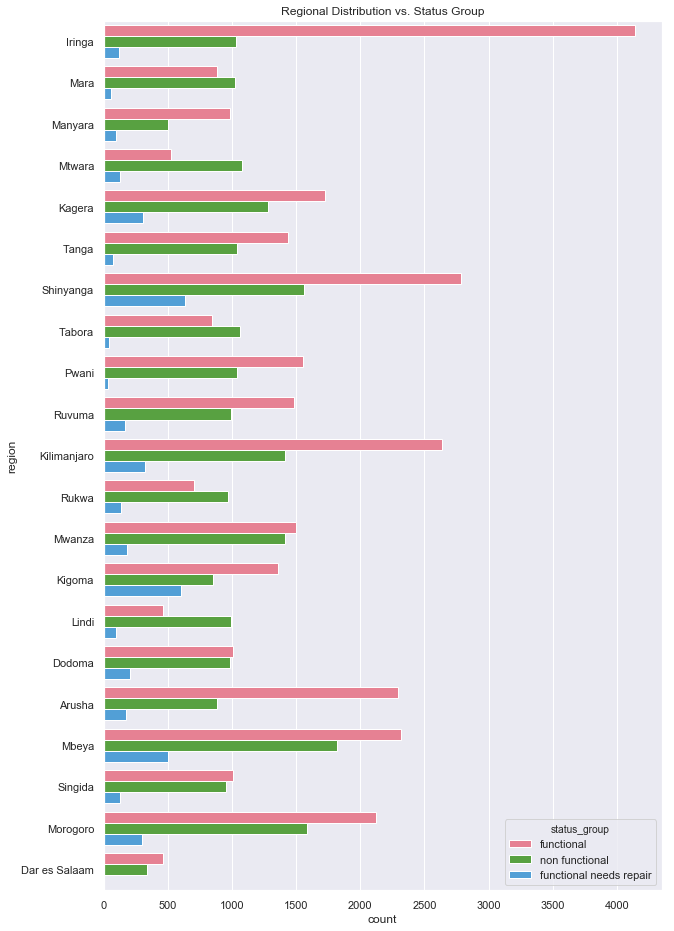

In [49]:
fig, ax = plt.subplots(figsize=(10,16))
ax = sns.countplot(y='region', hue='status_group', data=df_train, palette="husl")
ax.set_title('Regional Distribution vs. Status Group')

No missing value, 21 categories, keep

In [50]:
# 'region_code'
df_train['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [51]:
# 'district_code'
df_train['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [52]:
df_train = df_train.drop(columns = ['region_code', 'district_code'])
df_test = df_test.drop(columns = ['region_code', 'district_code'])

In [53]:
# 'population'
df_train['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

Text(0.5, 1.0, 'Distribution of population')

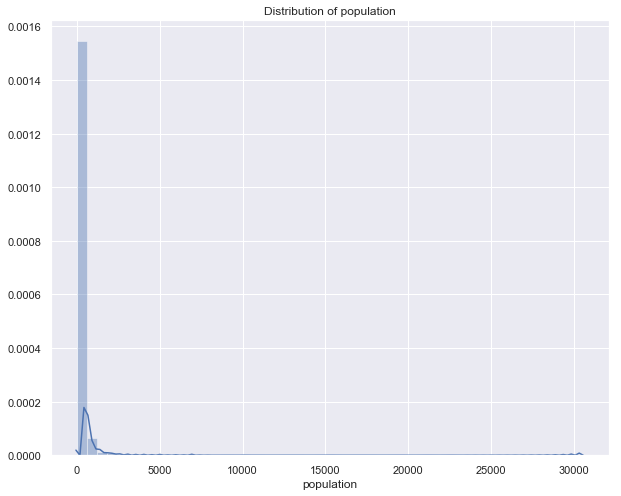

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.distplot(df_train['population'])
ax.set_title('Distribution of population')

In [55]:
df_train['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

**`population`: Very skewed. Need to be transformed.**

In [56]:
# amount_tsh: Amount of water available to the waterpoint
df_train['amount_tsh'].value_counts()

0.00         41639
500.00        3102
50.00         2472
1000.00       1488
20.00         1463
200.00        1220
100.00         816
10.00          806
30.00          743
2000.00        704
250.00         569
300.00         557
5000.00        450
5.00           376
25.00          356
3000.00        334
1200.00        267
1500.00        197
6.00           190
600.00         176
4000.00        156
2400.00        145
2500.00        139
6000.00        125
7.00            69
8000.00         61
750.00          59
40.00           59
10000.00        57
12000.00        51
             ...  
16000.00         2
16300.00         2
800.00           2
11000.00         2
590.00           2
520.00           2
26000.00         2
13000.00         2
9.00             1
170000.00        1
200000.00        1
900.00           1
0.25             1
53.00            1
350000.00        1
306.00           1
120000.00        1
26.00            1
59.00            1
60000.00         1
5400.00          1
70000.00    

Text(0.5, 1.0, 'Amount of water available')

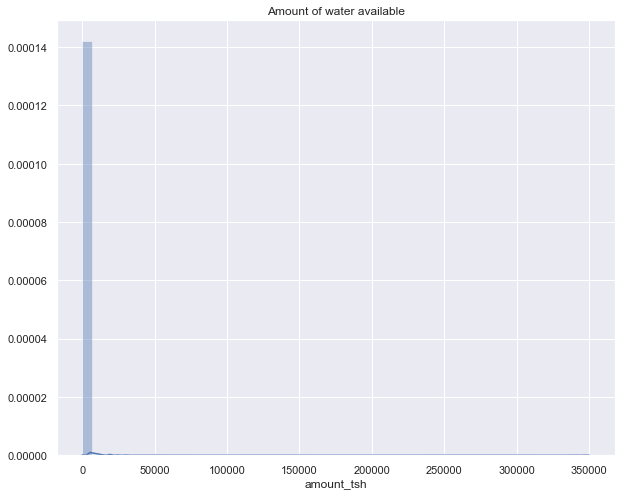

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.distplot(df_train['amount_tsh'])
ax.set_title('Amount of water available')

In [58]:
df_train['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

**`amount_tsh`: very skewed data. Need to be transformed.**

Guess: I think this may because there are some wells serving a huge amount of populations. 

The hist of `amount_tsh` and the hist of `population` are almost the same can prove this.

In [59]:
# 'public_meeting'
df_train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [60]:
# Attention: there are 3334 null values in this column, not too much, replace NA by unknow
df_train['public_meeting'] = df_train['public_meeting'].fillna('unknown')
df_test['public_meeting'] = df_test['public_meeting'].fillna('unknown')

In [61]:
# 'recorded_by'
df_train['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

All the value in this columns are the same, drop it.

In [62]:
df_train = df_train.drop(columns = ['recorded_by'])
df_test = df_test.drop(columns = ['recorded_by'])

In [63]:
# 'scheme_management':One who operates the waterpoint.
df_train['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [64]:
# Keep top 5
def scheme_cleaning(df):
    data = df['scheme_management']
    if data == 'VWC':
        return 'vwc'
    elif data == 'WUG':
        return 'wug'
    elif data == 'Water authority':
        return 'water_authority'
    elif data == 'WUA':
        return 'wua'
    elif data == 'Water Board':
        return 'water_board'
    else:
        return 'other'

In [65]:
df_train['scheme_management'] = df_train.apply(lambda row: scheme_cleaning(row), axis=1)
df_train['scheme_management'].unique()

array(['vwc', 'other', 'wug', 'water_board', 'wua', 'water_authority'],
      dtype=object)

In [66]:
df_test['scheme_management'] = df_test.apply(lambda row: scheme_cleaning(row), axis=1)
df_test['scheme_management'].unique()

array(['other', 'vwc', 'water_board', 'wug', 'wua', 'water_authority'],
      dtype=object)

In [67]:
# 'permit':If a permit exists for the waterpoint or not.
df_train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [68]:
# Attention: 3056 NA, replace by unknown
df_train['permit'] = df_train['permit'].fillna('unknown')
df_test['permit'] = df_test['permit'].fillna('unknown')

In [69]:
# 'construction_year'
df_train['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [70]:
df_train['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [71]:
# We can split this columns into '60s','70s','80s','90s','00s','10s','unknown'
def con_year_cleaning(df):
    year = df['construction_year'] 
    if year >= 1960 and year < 1970:
        return '60s'
    elif year >= 1970 and year < 1980:
        return '70s'
    elif year >= 1980 and year < 1990:
        return '80s'
    elif year >= 1990 and year < 2000:
        return '90s'
    elif year >= 2000 and year < 2010:
        return '00s'
    elif year >= 2010:
        return '10s'
    else:
        return 'unknown'

In [72]:
df_train['construction_year'] = df_train.apply(lambda row: con_year_cleaning(row), axis=1)
df_train['construction_year'].unique()

array(['90s', '10s', '00s', '80s', 'unknown', '70s', '60s'], dtype=object)

In [73]:
df_test['construction_year'] = df_test.apply(lambda row: con_year_cleaning(row), axis=1)
df_test['construction_year'].unique()

array(['10s', '00s', '80s', '90s', 'unknown', '70s', '60s'], dtype=object)

Text(0.5, 1.0, 'Construction Year vs. Status Group')

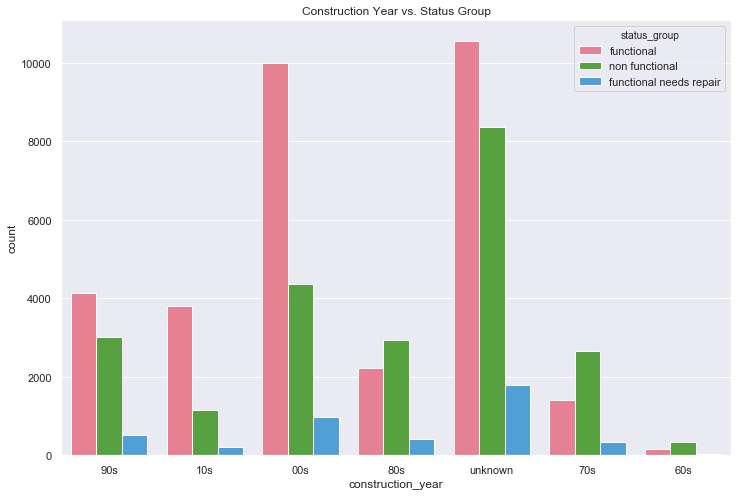

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='construction_year', hue='status_group', data=df_train, palette="husl")
ax.set_title('Construction Year vs. Status Group')

In [75]:
# 'extraction_type_class'
df_train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

Text(0.5, 1.0, 'Extraction Type vs. Status Group')

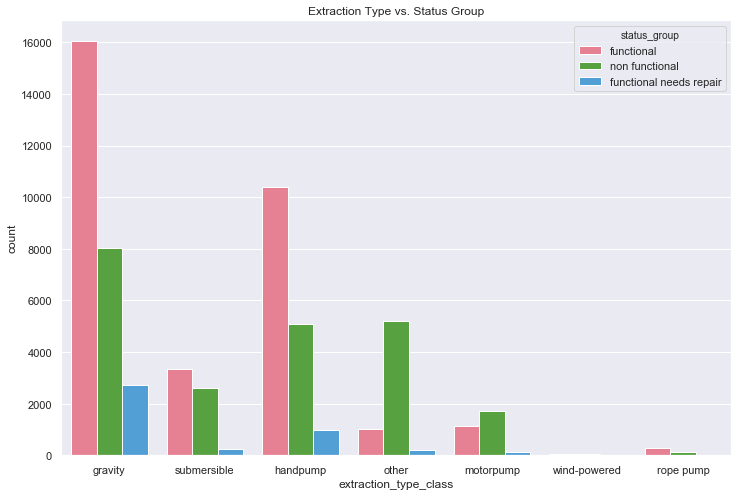

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='extraction_type_class', hue='status_group', data=df_train, palette="husl")
ax.set_title('Extraction Type vs. Status Group')

In [77]:
# 'management_group':How the waterpoint is managed.
df_train['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

Text(0.5, 1.0, 'Management Group vs. Status Group')

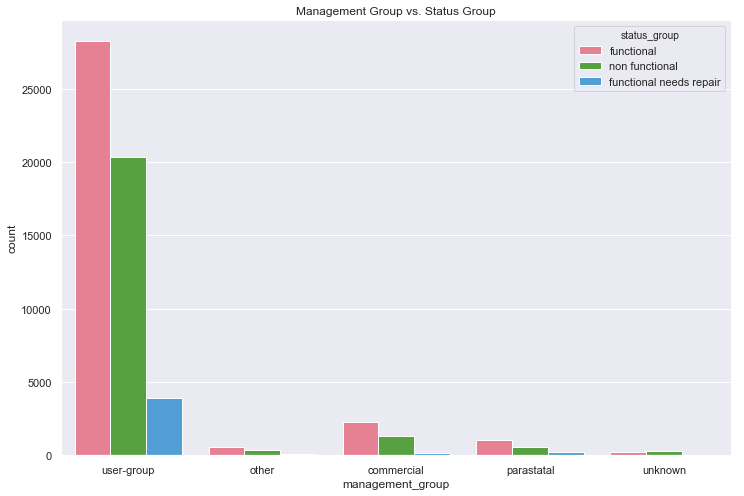

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='management_group', hue='status_group', data=df_train, palette="husl")
ax.set_title('Management Group vs. Status Group')

In [79]:
# 'payment_type'
df_train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Text(0.5, 1.0, 'Payment Type vs. Status Group')

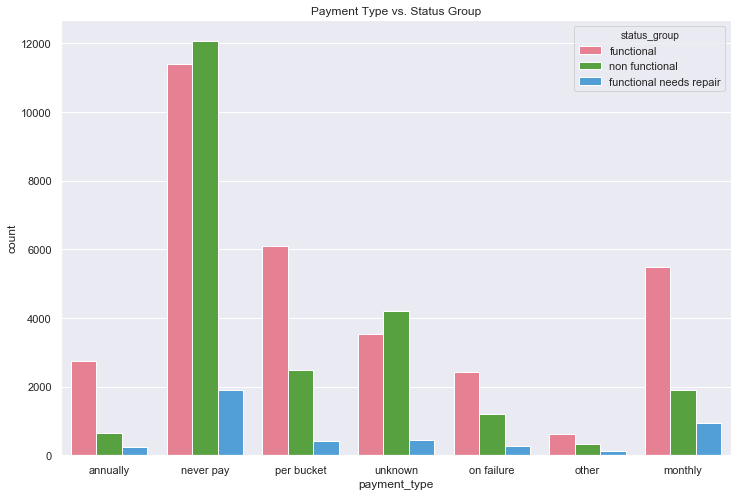

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue='status_group', data=df_train, palette="husl")
ax.set_title('Payment Type vs. Status Group')

In [81]:
# 'water_quality'
df_train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [82]:
# 'quantity'
df_train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [83]:
# 'source_class'
df_train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [84]:
# 'waterpoint_type_group'
df_train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [85]:
# Drop other geographical columns: 'lga', 'ward' 
df_train = df_train.drop(columns=['lga','ward'])
df_test = df_test.drop(columns=['lga','ward'])

- check columns we have now:

In [86]:
df_train.columns

Index(['id', 'amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'basin', 'region', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [100]:
df_train.shape

(59400, 21)

In [87]:
df_test.columns

Index(['id', 'amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'basin', 'region', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group'],
      dtype='object')

In [101]:
df_test.shape

(14850, 20)

- check null values:

In [88]:
df_train.apply(lambda x: sum(x.isnull()))

id                       0
amount_tsh               0
days_since_recorded      0
funder                   0
gps_height               0
installer                0
basin                    0
region                   0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source_class             0
waterpoint_type_group    0
status_group             0
dtype: int64

We do not have null values now.

In [89]:
df_test.apply(lambda x: sum(x.isnull()))

id                       0
amount_tsh               0
days_since_recorded      0
funder                   0
gps_height               0
installer                0
basin                    0
region                   0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source_class             0
waterpoint_type_group    0
dtype: int64

- Caculate coefficient correlation between each features.

In [90]:
# Checking the correlation values of training set
df_train.corr()

,id,amount_tsh,days_since_recorded,gps_height,population
id,1.000000,-0.005321,-0.003633,-0.004692,-0.002813
amount_tsh,-0.005321,1.000000,0.014629,0.076650,0.016288
days_since_recorded,-0.003633,0.014629,1.000000,-0.255878,-0.099737
gps_height,-0.004692,0.076650,-0.255878,1.000000,0.135003
population,-0.002813,0.016288,-0.099737,0.135003,1.000000


In [91]:
df_test.corr()

,id,amount_tsh,days_since_recorded,gps_height,population
id,1.000000,-0.016012,-0.026360,0.002711,-0.016068
amount_tsh,-0.016012,1.000000,0.020838,0.096230,0.028657
days_since_recorded,-0.026360,0.020838,1.000000,-0.240673,-0.082065
gps_height,0.002711,0.096230,-0.240673,1.000000,0.131994
population,-0.016068,0.028657,-0.082065,0.131994,1.000000


In [92]:
df_train.to_csv('data/trainset_clean.csv', index=False)

In [93]:
df_test.to_csv('data/testset_clean.csv', index=False)

- Transform categorical data into numerical data

In [94]:
dummy_cols = ['funder', 'installer', 'basin', 'region', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group']

In [95]:
df_train_dummy = pd.get_dummies(df_train, columns = dummy_cols)

In [96]:
df_test_dummy = pd.get_dummies(df_test, columns = dummy_cols)

In [97]:
df_train_dummy.head()

,id,amount_tsh,days_since_recorded,gps_height,population,status_group,funder_danida,funder_government,funder_hesawa,funder_other,...,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,995,1390,109,functional,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,8776,0.0,272,1399,280,functional,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,34310,25.0,281,686,250,functional,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,67743,0.0,309,263,58,non functional,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,19728,0.0,874,0,0,functional,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


- OUTPUT

In [98]:
df_train_dummy.to_csv('data/trainset_clean_dummy.csv', index=False)

In [99]:
df_test_dummy.to_csv('data/testset_clean_dummy.csv', index=False)